In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [36]:
data = pd.read_csv('C:\\Users\\DigitalS\\OneDrive\\Desktop\\1st_project\\single_genre_artists.csv')
data.head()

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.991,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.991,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22


In [37]:
data.columns

Index(['id_songs', 'name_song', 'popularity_songs', 'duration_ms', 'explicit',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'followers', 'genres',
       'name_artists', 'popularity_artists'],
      dtype='object')

In [38]:

data.dtypes

id_songs               object
name_song              object
popularity_songs        int64
duration_ms             int64
explicit                int64
id_artists             object
release_date           object
danceability          float64
energy                float64
key                     int64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
time_signature          int64
followers             float64
genres                 object
name_artists           object
popularity_artists      int64
dtype: object

In [39]:
data.shape


(95837, 23)

In [40]:
data.isnull().sum()

id_songs              0
name_song             0
popularity_songs      0
duration_ms           0
explicit              0
id_artists            0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
followers             0
genres                0
name_artists          0
popularity_artists    0
dtype: int64

In [41]:
# remove duplicates
data['name_song'].duplicated().sum()
data = data.drop_duplicates(subset='name_song', keep='first')

In [42]:
print(data.columns)


Index(['id_songs', 'name_song', 'popularity_songs', 'duration_ms', 'explicit',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'followers', 'genres',
       'name_artists', 'popularity_artists'],
      dtype='object')


In [43]:
# Columns to drop
cols_to_drop = [
    'id_songs', 'name_song', 'id_artists', 'name_artists', 
    'genres', 'release_date',
    'followers', 'popularity_songs', 'popularity_artists','explicit', 'key', 'mode', 'time_signature'
]

# Drop only if columns exist
data_clean = data.drop(columns=[col for col in cols_to_drop if col in data.columns])

print("Remaining columns after dropping:")
print(data_clean.columns)


Remaining columns after dropping:
Index(['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')


<Figure size 1400x1000 with 0 Axes>

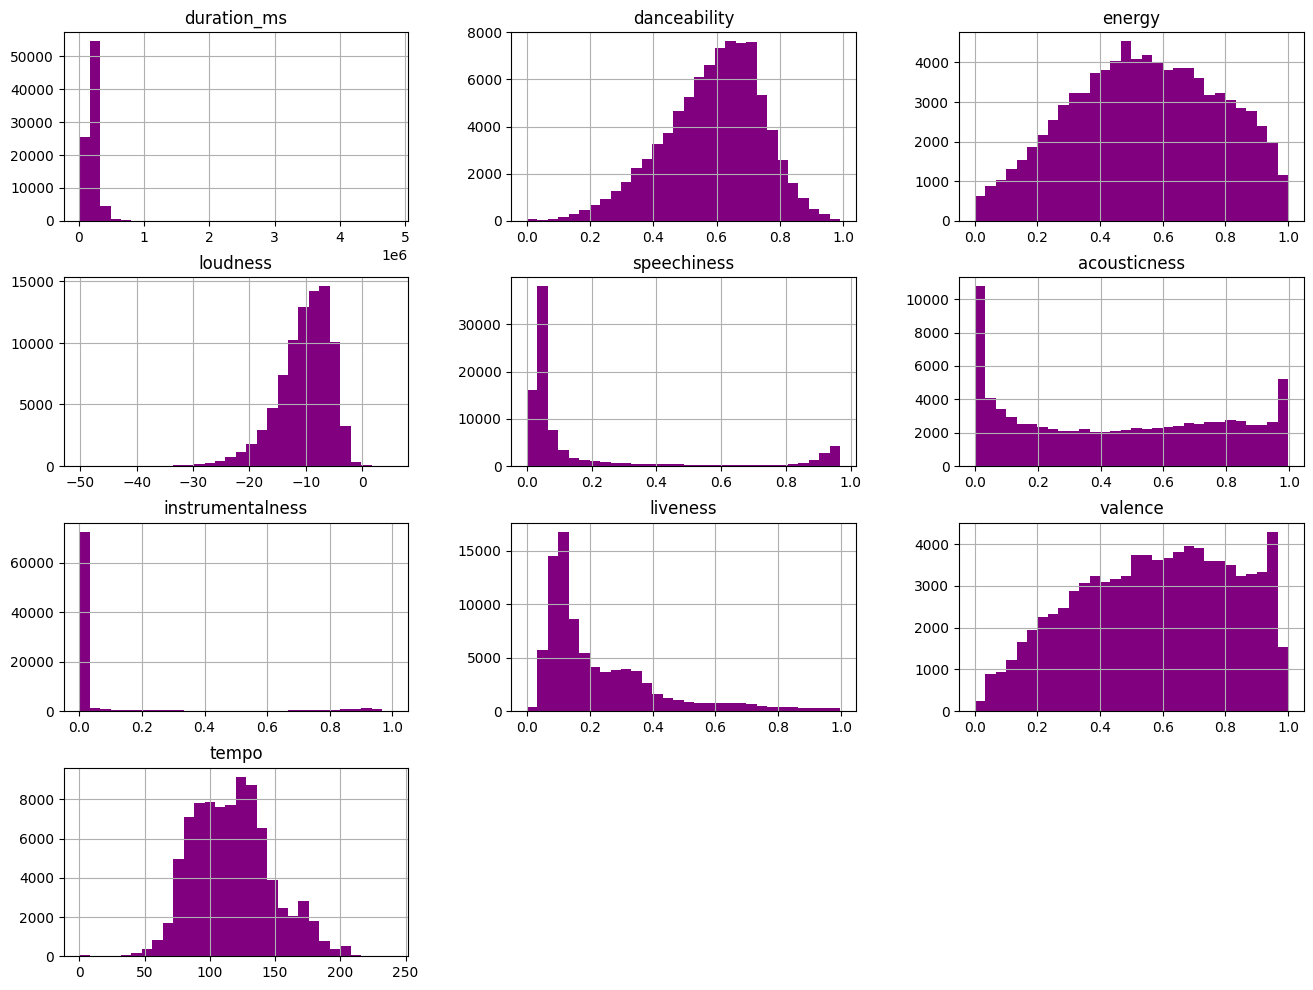

In [44]:

plt.figure(figsize=(14, 10))
data_clean.hist(bins=30, figsize=(16, 12), color='purple')
plt.show()


In [45]:
scaler = StandardScaler()

# Only numeric columns
numeric_cols = data_clean.select_dtypes(include=['float64', 'int64']).columns

scaled_data = scaler.fit_transform(data_clean[numeric_cols])

scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)

scaled_df.head()


,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.377191,-0.161219,-1.520072,-0.745457,-0.451063,1.625134,-0.348413,0.514394,0.317900,0.523058
1,0.132831,-1.039484,-1.537060,-1.085378,-0.396128,1.612964,-0.348480,-0.532692,-0.584106,-1.282130
2,0.008042,-0.497026,-1.426638,-1.114580,-0.423248,1.631218,-0.348480,1.008703,-0.381862,-1.547015
3,-0.373029,0.568515,-0.318173,-0.458899,-0.055389,1.619049,-0.348480,-0.049013,0.609131,0.413582
4,-0.323354,0.400612,-1.035915,-0.755752,-0.149266,1.619049,-0.348480,0.769521,1.086426,-1.365039


In [46]:
# Keep only recommended audio features
audio_features = [
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms'
]

# Create a new dataset with only these features
data_clean = data[audio_features]

# Display structure
print("Selected features for clustering:")
print(data_clean.head())
print("Shape:", data_clean.shape)


Selected features for clustering:
   danceability  energy  loudness  speechiness  acousticness  \
0         0.563   0.184   -13.757       0.0512         0.993   
1         0.427   0.180   -15.375       0.0670         0.989   
2         0.511   0.206   -15.514       0.0592         0.995   
3         0.676   0.467   -12.393       0.1650         0.991   
4         0.650   0.298   -13.806       0.1380         0.991   

   instrumentalness  liveness  valence    tempo  duration_ms  
0          0.000016     0.325    0.654  133.088       161427  
1          0.000000     0.128    0.431   78.459       223440  
2          0.000000     0.418    0.481   70.443       208267  
3          0.000000     0.219    0.726  129.775       161933  
4          0.000000     0.373    0.844   75.950       167973  
Shape: (85427, 10)


In [47]:
# PCA to reduce 10 features into 2 features
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_clean)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(
    pca_components,
    columns=['PC1', 'PC2']
)

pca_df.head()


,PC1,PC2
0,-45862.230730,16.590622
1,16150.768211,-39.250136
2,977.768061,-46.976020
3,-45356.230789,13.311396
4,-39316.231821,-40.647242


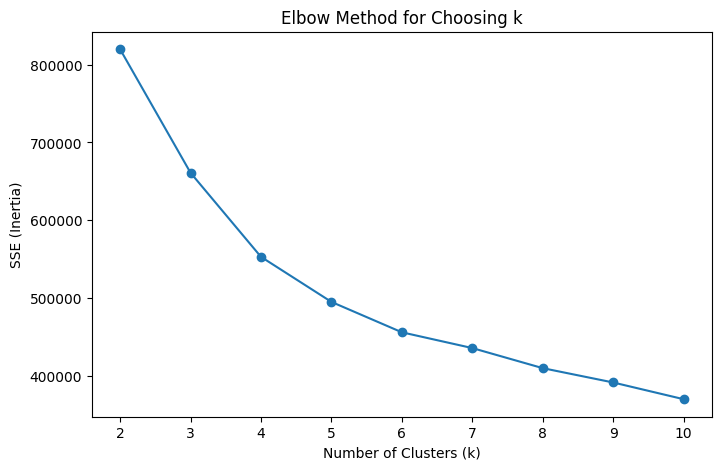

In [48]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []  # Sum of Squared Errors

K = range(2, 11)  # test k = 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)  # inertia = SSE

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K, sse, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for Choosing k")
plt.show()


In [49]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    print(f"k={k}, Silhouette Score={score}")


k=2, Silhouette Score=0.7008634094777453
k=3, Silhouette Score=0.2038644412017433
k=4, Silhouette Score=0.24301798186536291
k=5, Silhouette Score=0.2325762384181238
k=6, Silhouette Score=0.18952132389926943
k=7, Silhouette Score=0.16973419889470365
k=8, Silhouette Score=0.16838580853091395
k=9, Silhouette Score=0.16740053856715056
k=10, Silhouette Score=0.1750170445329935


In [50]:
from sklearn.cluster import KMeans

best_k = 2

kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

# Add cluster labels
data_clean['cluster'] = clusters

data_clean.head()


C:\Users\DigitalS\AppData\Local\Temp\ipykernel_13660\944541927.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['cluster'] = clusters


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.563,0.184,-13.757,0.0512,0.993,0.000016,0.325,0.654,133.088,161427,1
1,0.427,0.180,-15.375,0.0670,0.989,0.000000,0.128,0.431,78.459,223440,1
2,0.511,0.206,-15.514,0.0592,0.995,0.000000,0.418,0.481,70.443,208267,1
3,0.676,0.467,-12.393,0.1650,0.991,0.000000,0.219,0.726,129.775,161933,1
4,0.650,0.298,-13.806,0.1380,0.991,0.000000,0.373,0.844,75.950,167973,1


In [51]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(scaled_df, data_clean['cluster'])
print("Davies-Bouldin Index:", db_index)


Davies-Bouldin Index: 0.7004244230624646


In [52]:
print("Inertia:", kmeans.inertia_)


Inertia: 820037.3581447229


In [53]:
cluster_profile = data_clean.groupby('cluster').mean()
cluster_profile


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
cluster,,,,,,,,,,
0,0.504060,0.427996,-15.824917,0.465659,0.661274,0.162156,0.414384,0.395335,103.796772,1.748465e+06
1,0.588168,0.542193,-10.195093,0.180242,0.458331,0.079918,0.227771,0.575842,117.291642,2.035638e+05


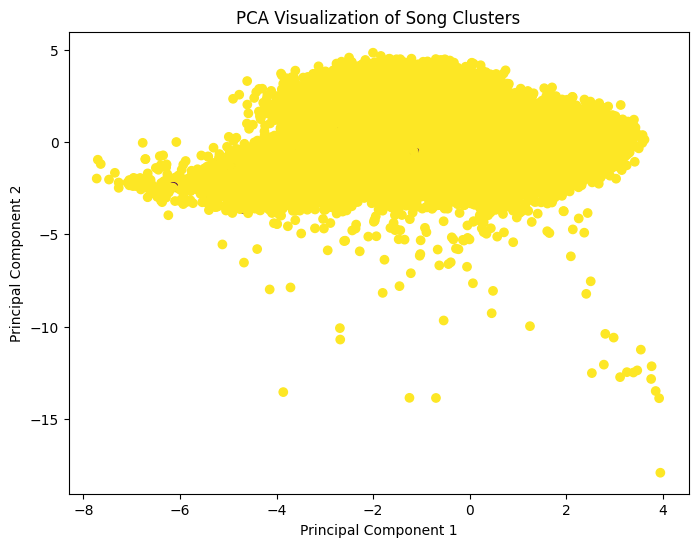

In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

# Create DataFrame for plotting
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['cluster'] = data_clean['cluster']

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Song Clusters')
plt.show()


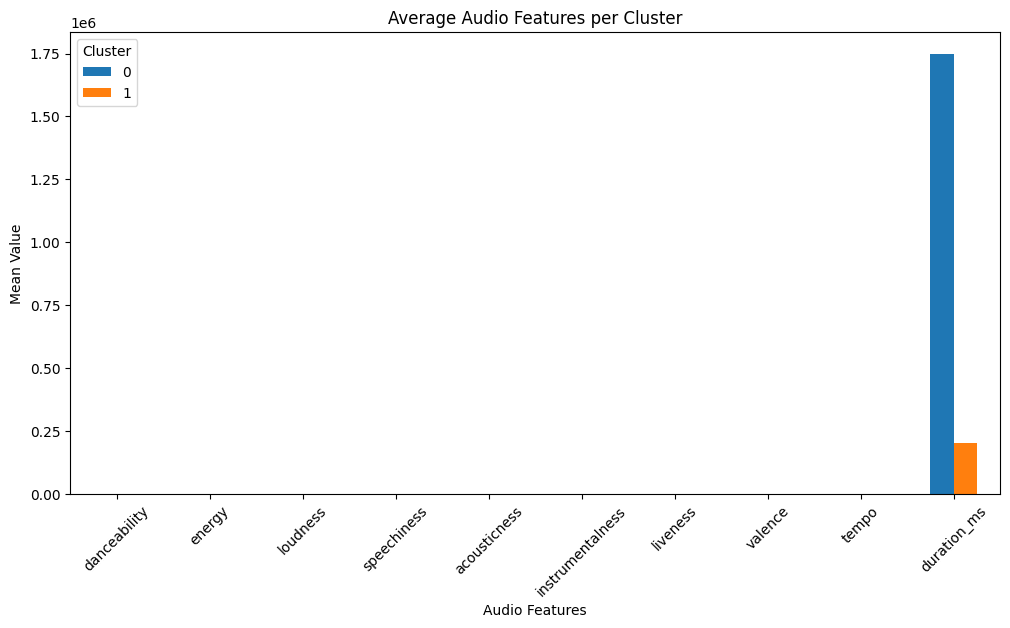

In [55]:
cluster_means = data_clean.groupby('cluster').mean()

cluster_means.T.plot(kind='bar', figsize=(12, 6))
plt.title('Average Audio Features per Cluster')
plt.ylabel('Mean Value')
plt.xlabel('Audio Features')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()


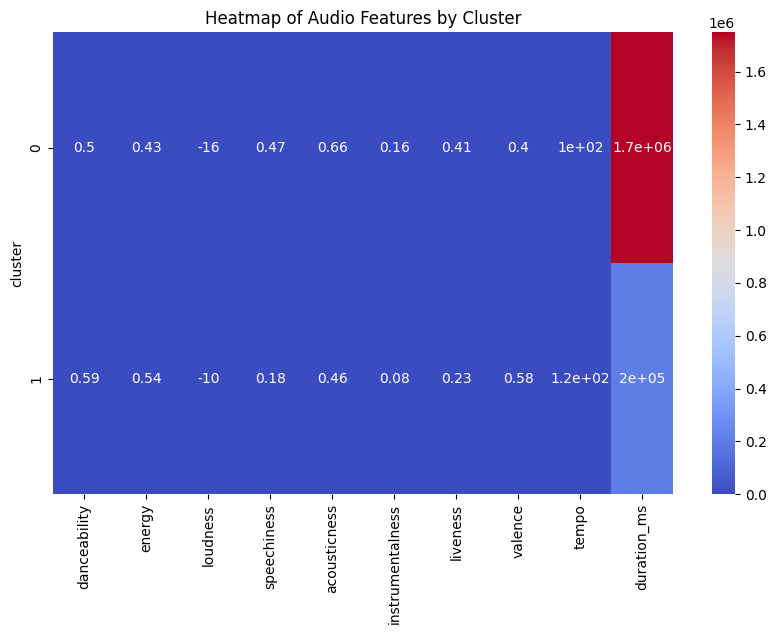

In [56]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm')
plt.title('Heatmap of Audio Features by Cluster')
plt.show()


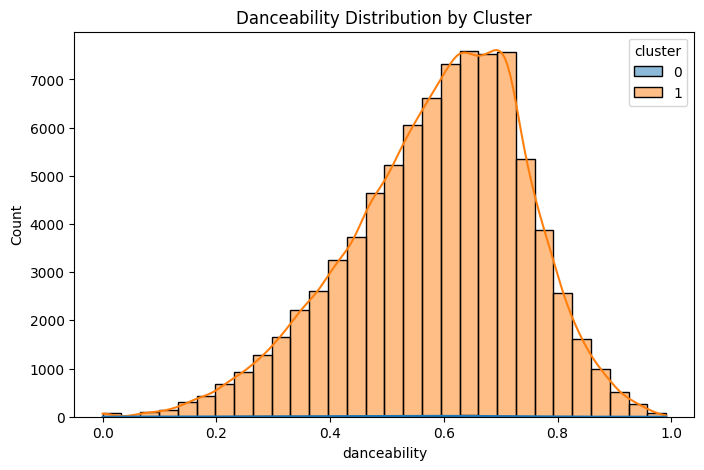

In [57]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(data_clean, x='danceability', hue='cluster', bins=30, kde=True)
plt.title('Danceability Distribution by Cluster')
plt.show()


In [59]:
# Add cluster labels to original dataset
data['cluster'] = data_clean['cluster']

# Check result
data[['name_song', 'name_artists', 'cluster']].head()


,name_song,name_artists,cluster
0,La Java,Mistinguett,1
1,En Douce,Mistinguett,1
2,J'en Ai Marre,Mistinguett,1
3,Ils n'ont pas ca,Mistinguett,1
4,La belote,Mistinguett,1


In [60]:
data['cluster'].value_counts()


cluster
1    85221
0      206
Name: count, dtype: int64

In [61]:
data.groupby('cluster')[['name_song', 'name_artists']].head(5)


,name_song,name_artists
0,La Java,Mistinguett
1,En Douce,Mistinguett
2,J'en Ai Marre,Mistinguett
3,Ils n'ont pas ca,Mistinguett
4,La belote,Mistinguett
2092,First Inaugural Address - 03 04 1933,Franklin Delano Roosevelt
2093,Defending the New Deal - 04 28 1935,Franklin Delano Roosevelt
2095,Speech at Madison Square Garden - 10 31 1936,Franklin Delano Roosevelt
2096,German submarine fired an American destroyer -...,Franklin Delano Roosevelt
2098,On the Progress of the War - 02 23 1942,Franklin Delano Roosevelt


In [62]:
data.to_csv("amazon_music_clustered_songs.csv", index=False)
